신경망에서 인접한 두 단(layer)간의 연결(connection) weight들을 나타낼 때 보통 다음 두 가지 중 하나의 방법을 사용한다.

<img src="./images/two_connection_weights_types.PNG" width="1300" />
<center><그림-1></center>

- 타입-1) 에서 $w_{jk}$는 앞의 ($l-1$) 단의 k번 neuron과 뒷단인 $l$ 단의 j번 neuron간의 connection weight를 표기. 이 경우 weight 행렬의 모양이 $l\:$단사이즈 X $(l-1)\:$ 단 사이즈. &nbsp; 이 그림에서는 4X3 사이즈  


- 타입-2) 에서 $w_{jk}$는 ($l-1$) 단의 j번 nuron과 $l$ 단의 k번 neuron간의 connection weight를 의미. 이 경우 weight 행렬의 모양이 $(l-1)\:$단 사이즈 X $l\:$단 사이즈. &nbsp; 3X4 사이즈


어느 형태를 선택하는가에 따라 행렬(matrix)식이 달라진다. 이 이유로 신경망을 처음 배우는 사람들이 혼란스러워 한다. 불행이도 가르치는 내용 중에도 틀린(wrong) 얘기가 가끔씩 있음. 이 두 표기에 따른 차이에 확실히 익숙해지자. 잠깐 선형대수학을 돌아보자.

<br>

## 선형대수 잠깐 돌아보기 
<br>
### 길이가 같은 두 벡터(rank 1 텐서) $a$, $b$ 간의 내적(dot product) 
- 보통 $a\circ b$로 나타낸다. Dot product이 곱들의 합으로 (sum of products) 그 결과가 스케일러(scalar)임을 모든 사람들이 알기에 두 벡터가 row 벡터인지, 또는 column 벡터인지 잘 묻지 않는다. 그러나 dot product을 행렬 곱하기로 나타낼 때에는 사정이 달라진다.  


- 두 벡터 $a$, $b$ 가 모두 column vector이면 이들의 dot product은 행렬식으로 $a^{T}b$ 또는 $b^{T}a$ 이다. ($ba^{T}$ 또는 $ab^{T}$ 이면 outer product가 되어 전혀 다른 얘기) 

### Matrix(rank 2 텐서)와 벡터의 곱   

$n\times p$ 행렬 $X$와 사이즈가 $p$인 column 벡터 $\beta$가 있다. 이들의 행렬-벡터 곱 $X\beta$는 사이즈가 $n$인 column 벡터가 되며, 아래와 같이 column 벡터 $\beta$의 원소가 coefficient로 된, 행렬 $X$의 column들의 linear combination. 

<img src="./images/matrix_vector_product.PNG" width="1300" />

### Matrix의 곱

행렬 곱을 해당 row와 column의 dot product로 정의하거나, 또는 matrix-vector 곱의 집합이라고 정의한다. 이 두가지 해석을 살펴보자. 

m x n 행렬 $A$와, n x p 행렬 $B$가 있다. 

**$\color{red}{Interpretation 1}$** : 어린 방법 

행렬곱 $C = AB$는 mxp 행렬로 그 $(i, j)$번 원소는 행렬 $A$의 $i$번 행(row) $a_{i}^{T}$와 행렬 $B$의 $j$번 열(column) $b_{j}$간의 dot product이다. 
<img src="./images/matrix_product_1.PNG" width="800" />

** 즉, $c_{i,j}=a_{i}^{T}b_{j}$ **   $\:\:$ ( $a_{i}^{T}: row \;벡터, \:\: b_{j}: column $ 벡터 )

<br>
**$\color{blue}{Interpretation 2}$** : 성숙한 방법 

행렬 B가 $b_{1}, b_{2}, . . . , b_{p}$ 열들로 되어 있으면, 행렬곱 $C = AB$는 mxp 행렬로 $Ab_{1}, Ab_{2}, . . . , Ab_{p}$를 column으로 갖는다.  ($Ab_{i}$ (i=1, ... p)는 행렬-벡터 곱) 

$ C = AB = A[ b_{1} \enspace b_{2} \enspace . . . b_{p}] = [Ab_{1} \enspace Ab_{2} \enspace . . . Ab_{p}]$

<br>
**$\bf\color{red}{[note]}$** 매트릭스 곱하기를 두번째 방식, 즉 $C$의 p개 ***column*** 들을 매트릭스 $A$와 매트릭스 $B$의 p개 column간의 (앞에서 본 것 같이) ***matrix-vector 곱***으로 생각하는 것이 좋은, 우아한 해석. 이래야 span, linear independence ... 로 이어지는 선형대수학을 이해함. 신경망 공부에도 물론 더 좋음. 

--------------------

# 신경망

<img src="./images/simple_nn.PNG" width="400"  />
<center><그림-2></center>

매우 익숙한 그림. 우리 관심은 weight 표기에 따른 행렬식의 표현이기에 Bias=0, activation 함수를 linear identity로 하여 $y=z$ 로 단순화. 

- $y = z = \sum_{i=1}^{3}w_{i}x_{i} $     
- $w = [w_{1} \: w_{2} \: w_{3}]^{T}$,  &nbsp;  &nbsp; $x = [x_{1} \: x_{2} \: x_{3}]^{T}$ 하여 $w$와 $x$가 column vector이면 $y = w^{T}x $ 

### 입력이 여럿일 경우 
x 를 하나의 입력 instance(샘플), $x_{1} , x_{2} , x_{3}$ 들을 x의 세 feature 값이라 생각하자. (가령, x는 하나의 이미지, $x_{1} , x_{2} , x_{3}$ 는 이미지를 구성하는 세 픽셀). x같은 instance들이 여러개 들어온다고 하고 이들을 $x^{(1)}, \: x^{(2)}, .. x^{(n)},.. $라 표시하자. 각각의  $x^{(i)}$는 column vector. &nbsp; $y^{(1)}, \: y^{(2)}, .. y^{(n)},.. $ 는 $x^{(1)}, \: x^{(2)}, .. x^{(n)}...$에 따른 (scalar) output. 

이 경우에도 $Y=w^{T}X$ 행렬식이 성립된다. 이 때 X는 $x^{(1)}, \: x^{(2)}, .. x^{(n)}...$ 입력 샘플들을 column으로 갖는 행렬.

<img src="./images/simple_nn_stream.PNG" width="1000" />
<center> <그림-3> </center>


### 레이어에 뉴런들이 여럿일 때
일반적인 신경망 모양이다. 여기서는 인접한 두 레이어의 뉴런 수가 3과 4개인 신경망을 예로 들지만, 다른 일반적인 신경망에도 아래의 내용이 통한다. 앞의 그림을 다시 본다. 
<img src="./images/two_connection_weights_types.PNG" width="1300" />

- 타입-1) 에서 $w_{jk}$는 ($l-1$) 레이어의 k번 neuron과 $l$ layer의 j번 neuron간의 connection weight를 의미 
- 타입-2) 에서 $w_{jk}$는 ($l-1$) 레이어의 j번 neuron과 $l$ layer의 k번 neuron간의 connection weight를 의미 

위 그림에서 weight connection을 벡터형태로 표현하기에 적당하지 않다. 행렬로 해야 하는데, 문제는 weight의 표기를 어떻게 해야 weight들이 행렬의 원소로 되면서 두 레이어의 뉴런간 연결이 행렬식으로 자연스럽게 표현될까 하는 것. 

***[주의]*** &nbsp; 타입-1 이나 타입-2 에서 같은 위치에 있는 weight 값은 같다. 즉, 타입-1 에서 $w_{ij}$는 타입-2 에서 $w_{ji}$와 값이 같다.   


### 1) weight 표기를 타입-2 형태로 하면:

$z_{1} = w_{11}x_{1} + w_{21}x_{2} + w_{31}x_{3}$
<br>
 &nbsp;  &nbsp;  &nbsp;   :
<br>
$z_{4} = w_{14}x_{1} + w_{24}x_{2} + w_{34}x_{3}$

위와 같은 선형식이 된다. 타입-2 에서 weight 행렬은 아래와 같다.

$ W = \begin{bmatrix}
w_{11} & w_{12} & w_{13} & w_{14}\\ 
w_{21} & w_{22} & w_{23} & w_{24}\\ 
w_{31} & w_{32} & w_{33} & w_{34}\\
\end{bmatrix} $  &nbsp; &nbsp;  &nbsp; 따라서, $W^{T} = \begin{bmatrix}
w_{11} & w_{21} & w_{31} \\ 
w_{12} & w_{22} & w_{32} \\ 
w_{13} & w_{23} & w_{33} \\ 
w_{14} & w_{24} & w_{34} \\
\end{bmatrix}$

X, Z, Y 벡터를 다음과 같이 column 벡터로 정하면,

$ X = \begin{bmatrix}
x_{1} \\ 
x_{2} \\ 
x_{3} \\ 
\end{bmatrix} $ &nbsp; &nbsp;  &nbsp;  $Z = \begin{bmatrix}
z_{1} \\ 
z_{2} \\ 
z_{3} \\ 
z_{4} \\
\end{bmatrix} $  &nbsp; &nbsp;  &nbsp;  $Y = \begin{bmatrix}
y_{1} \\ 
y_{2} \\ 
y_{3} \\ 
y_{4} \\
\end{bmatrix} $



$\begin{bmatrix}
z_{1} \\ 
z_{2} \\ 
z_{3} \\ 
z_{4} \\
\end{bmatrix} $ = $ \begin{bmatrix}
w_{11} & w_{21} & w_{31} \\ 
w_{12} & w_{22} & w_{32} \\ 
w_{13} & w_{23} & w_{33} \\ 
w_{14} & w_{24} & w_{34} \\
\end{bmatrix}$ $ \begin{bmatrix}
x_{1} \\ 
x_{2} \\ 
x_{3} \\ 
\end{bmatrix} $ 으로 식을 세우면, $z_1,z_2,z_3,z_4$  선형식과 딱 맞는다. 행렬식으로는, 

$Z = W^{T}X $. &nbsp; 앞에서 bias=0, activation 함수를 identity 함수로 가정했기에 $Y=Z$ 이므로, 

$Y = W^{T}X $
<center> <식-1> <center> 

X와 Y는 여기서 하나의 instance를 나타내는 column 벡터이지만, X가 여러 instance들로 된 행렬, Y는 그에 따른 output 행렬일 경우에도 물론 위 식이 성립한다. (행렬 곱하기의 'interpretation-2', &nbsp; remember?) 각각의 instance들이 행렬 X와 Y의 column.    

난 이 모양새를 처음 익힐 때 "여러 feature들로 된 input 인스턴스  $x^{(i)}$ 들이 (column 모양으로) 서서 들어와, $W^{T}$로 된 weight matrix를 거쳐 $y^{(i)}$ 가 되어, column 모양으로 출력쪽으로 빠져 나간다" 라 머리 속에서 그렸음. 이 y들은 다시 뒷 단의 입력 x가 되거나, recurrent network에선 feedback되어 이 과정이 반복되고.

$Y = W^TX$ : 오래전 패턴인식, 신경망을 익힌 사람들이 익숙한 형태. 나 역시. 

### $W$의 transpose  '$T$'가 그리도 눈에 거슬리면, 양 쪽을 transpose 하여,

$Y^{T} = (W^{T}X)^{T} = X^{T}W $  

--> instance(샘플)들이 column이던 X가 transpose 되었으니 입력 instance(샘플)들이 row로 됨. 이 입력 instance가 $W$를 거쳐 역시 row 형태의 y instance들이 되어 나감. (신경망으로의 입력과 레이어 출력이  테이블, pandas/R의 데이타프레임과 같은 형태)  

#### 정리하면,

타입-2 로 두 레이어의 뉴런간 연결 weight들을 표기하면, 식-1의 weight 행렬 W가 만들어지고, 역시 위 식에서 같이 X, Y를 만들면,

$Y = W^{T}X $  &nbsp; (X, Y instances are columnar), 또는

$Y^{T} = X^{T}W $ 


### 간단히 numpy로,  

In [1]:
import numpy as np

W2 = np.array([[11, 12, 13, 14],     # W2: 타입-2 형태 신경망 weight 매트릭스  
              [21, 22, 23, 24],
              [31, 32, 33, 34]])
            
# input sample 을 5개 만듬 
x1 = np.array(np.arange(1, 4).reshape(3,1))      # 첫번째 입력 샘플 : 사이즈 3 인 column 벡터 
x2 = np.array(np.arange(-2, 1).reshape(3,1))
x3 = np.array(np.arange(2, 5).reshape(3,1))
x4 = np.array(np.arange(5, 8).reshape(3,1))
x5 = np.array(np.arange(4, 1, -1).reshape(3,1))

X = np.hstack([x1, x2, x3, x4, x5])     # 다섯 인스턴스로 된 입력 매트릭스 (batch 사이즈가 5) 

In [2]:
x1      # column 벡터 (3x1 행렬) 

array([[1],
       [2],
       [3]])

In [3]:
x2

array([[-2],
       [-1],
       [ 0]])

In [4]:
X       # batch 입력 : 5개 샘플로 된 3x5 행렬   

array([[ 1, -2,  2,  5,  4],
       [ 2, -1,  3,  6,  3],
       [ 3,  0,  4,  7,  2]])

In [5]:
W2

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]])

In [6]:
W2_T = W2.transpose()   # W2_T : W2를 transpose 
W2_T

array([[11, 21, 31],
       [12, 22, 32],
       [13, 23, 33],
       [14, 24, 34]])

첫번 째 입력 샘플 $x^{(1)}$이 들어올 때 $z^{(1)}$의 component 값들을 구해보면;

In [7]:
z0 = W2[0,0]*x1[0] + W2[1,0]*x1[1] + W2[2,0]*x1[2]  # python 인덱싱은 0 부터
z1 = W2[0,1]*x1[0] + W2[1,1]*x1[1] + W2[2,1]*x1[2]
z2 = W2[0,2]*x1[0] + W2[1,2]*x1[1] + W2[2,2]*x1[2]
z3 = W2[0,3]*x1[0] + W2[1,3]*x1[1] + W2[2,3]*x1[2]

z0, z1, z2, z3

(array([146]), array([152]), array([158]), array([164]))

$x^{(1)}$이 들어올 때 $z^{(1)}$의 component 값들을 행렬식으로 구하면, 앞에서 언급했듯이 column 벡터로 나옴

In [8]:
z = np.dot(W2_T, x1)
z

array([[146],
       [152],
       [158],
       [164]])

5개 샘플로 된 입력 배치가 행렬 X로 들어오면, &nbsp; $Z = W^{T}X $ 

In [9]:
Z = np.dot(W2_T, X)
Z

array([[146, -43, 209, 398, 169],
       [152, -46, 218, 416, 178],
       [158, -49, 227, 434, 187],
       [164, -52, 236, 452, 196]])

$Z^{T} = X^{T}W $ 으로 할 수도 있으므로,
- 이 때는 입력행렬 내 x 샘플들이 row 벡터들로 되어있고,
- 출력 y들도 row 벡터로 됨 

In [10]:
Z_T = np.dot(X.transpose(), W2)
Z_T

array([[146, 152, 158, 164],
       [-43, -46, -49, -52],
       [209, 218, 227, 236],
       [398, 416, 434, 452],
       [169, 178, 187, 196]])

<br>

### 2) weight 표기를 타입-1 형태로 하면:

$w_{24}$를 단순히 보면 앞 레이어의 2번 뉴런과 뒷 레이어의 4번 뉴런을 연결하는 weight라 생각하는 것이 자연스럽다. 그런데, 타입-1 표기에서 $w_{24}$는 앞단의 4번 뉴런과 뒷단의 2번 뉴런을 연결하는 weight다. 왜 이렇게 했을까?

일단 타입-1에 따라 식을 만들어보자.

$z_{1} = w_{11}x_{1} + w_{12}x_{2} + w_{13}x_{3}$
<br>
 &nbsp;  &nbsp;  &nbsp;   :
<br>
$z_{4} = w_{41}x_{1} + w_{42}x_{2} + w_{43}x_{3}$

위와 같은 선형식이 된다. 타입-1 에서 weight 행렬은 4x3 행렬로 아래와 같다.

$ W = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\ 
w_{21} & w_{22} & w_{23} \\ 
w_{31} & w_{32} & w_{33} \\
w_{41} & w_{42} & w_{43} \\
\end{bmatrix} $  

그런데, 위 W를 보니 행렬의 모양이 타입-2의 $W^{T}$ 의 모양과 같고, 원소값들도 그 $W^{T}$ 의 것들과 같음을 알 수 있다.  (타입-1 에서 $w_{ij}$는 타입-2 에서 $w_{ji}$와 값이 같다)    


### 즉, 타입-1로 weight를 표기한 weight 매트릭스는, 타입-2 weight 매트릭스의 transpose 와 같다.   이 말은, 
<br>
$ X = \begin{bmatrix}
x_{1} \\ 
x_{2} \\ 
x_{3} \\ 
\end{bmatrix} $ &nbsp; &nbsp;  &nbsp;  $Z = \begin{bmatrix}
z_{1} \\ 
z_{2} \\ 
z_{3} \\ 
z_{4} \\
\end{bmatrix} $  &nbsp; &nbsp;  &nbsp;  $Y = \begin{bmatrix}
y_{1} \\ 
y_{2} \\ 
y_{3} \\ 
y_{4} \\
\end{bmatrix} $

으로 하면 타입-1 weight matrix $W$ 으로는,

$Y = WX $, 또는

$Y^{T} = X^{T}W^{T}$  &nbsp; &nbsp; (여기서 $W^{T}$는 타입-2 에서의 $W$와 같음)



### So, 타입-1에서 weight를 이상하게 표현하고 헷갈리게 한 것이 타입-2 weight 매트릭스의 transpose 'T' 를 없애려고?  

### 그렇다!

내 기억으론, Rumelhart, Hinton, Williams의 [PDP 책](http://www.cs.toronto.edu/~fritz/absps/pdp8.pdf)에서 이 표기를 쓰기 전에 별로 이런 표기를 본 적이 없는데, 이들이 이렇게 쓴 이후로 타입-1 표현이 틈틈이 보임. 어떤 표기를 써도 괜찮은데, 좀 알고 일관적으로 사용하면 좋겠음.

<br>
## Tensorflow 에서는,

### [여기의](https://www.tensorflow.org/tutorials/mnist/beginners/) 텐서플로우 설명은 타입-1 weight 표기를 사용했음.  (아래 그림 참조)
- 입력 x, 출력 y, bias 모두 어여쁘게 column vector로 나타내었음

In [11]:
import tensorflow as tf
from IPython.display import Image
sess = tf.InteractiveSession() 
print("Tensorflow version : ", tf.__version__)

Tensorflow version :  1.0.0


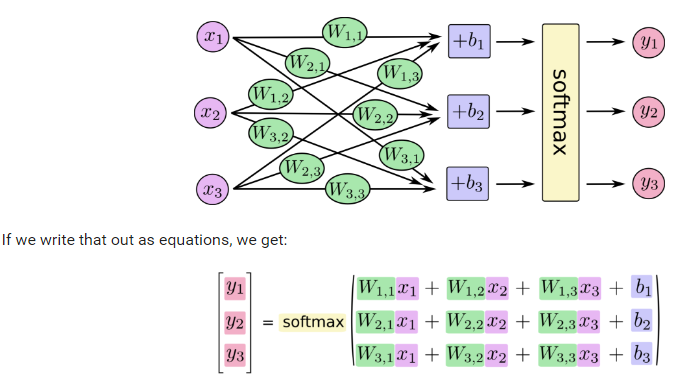

In [12]:
Image(filename='./images/NN_tensorflow.PNG', width=600)  # from tensorflow.

<center> <텐서플로우_그림> <center> 

In [13]:
# x들이 그대로 있나 확인 
x1, x5

(array([[1],
        [2],
        [3]]), array([[4],
        [3],
        [2]]))

In [14]:
X

array([[ 1, -2,  2,  5,  4],
       [ 2, -1,  3,  6,  3],
       [ 3,  0,  4,  7,  2]])

#### tensorflow 데이타 준비 

In [15]:
tf_x1 = tf.constant(x1, dtype=tf.int32)
tf_x1   # column  벡터 

<tf.Tensor 'Const:0' shape=(3, 1) dtype=int32>

In [16]:
tf_X = tf.constant(X, dtype=tf.int32)
tf_X    # 3x5 모양의 2D 텐서로 5개의 샘플(input)이 5개의 column 벡터로 

<tf.Tensor 'Const_1:0' shape=(3, 5) dtype=int32>

In [17]:
W1 = W2_T    # 타입-1의 W는 타입-2의 Weight 매트릭스의 transpose
tf_W1 = tf.constant(W1, dtype=tf.int32)
tf_W1         # 4x3 모양의 weight matrix로 tensorflow 예를 따른 것 

<tf.Tensor 'Const_2:0' shape=(4, 3) dtype=int32>

### 위 그림이 타입-1으로 되었기에, Y=WX 로 출력을 구하면,

In [18]:
# tensorflow의 행렬 곱하기  
Y = tf.matmul(tf_W1, tf_X)  # 당연히 맞는 결과.   
Y.eval()

array([[146, -43, 209, 398, 169],
       [152, -46, 218, 416, 178],
       [158, -49, 227, 434, 187],
       [164, -52, 236, 452, 196]], dtype=int32)

물론 잘 됨. Y의 instance들이 column으로 나옴 

<br>

In [19]:
# numpy의 행렬 곱하기로 똑 같이 하면,
np.dot(W1, X)

array([[146, -43, 209, 398, 169],
       [152, -46, 218, 416, 178],
       [158, -49, 227, 434, 187],
       [164, -52, 236, 452, 196]])

--> 당연히 numpy와 tensorflow 행렬 곱하기는 똑 같이 동작

### 방금 보았듯이 X가 여러개의 샘플로 된 2D 텐서(행렬) 이더라도 텐서플로우에서 Y=WX 식이 당연히 생각한 그대로 동작하고 잘 됨.  따라서, 텐서플로우 설명에서 적었듯이 ;

""" <br>
y = tf.nn.softmax(tf.matmul(x, W) + b)

First, we multiply x by W with the expression tf.matmul(x, W). This is flipped from when we multiplied them in our equation, where we had ***Wx***, as a small trick to deal with x being a 2D tensor with multiple inputs. We then add b, and finally apply tf.nn.softmax.

"""

*** $\bf\color{red}{[note]}$ 단순히 X 가 여러개의 input(sample) 들로 된 행렬이라서 Y=XW 로 행렬 곱하기를 하는 것이 아니라, X 내의 input(인스턴스) 들이 column이 아니라, row 이기 때문. *** (DB 테이블, pandas/R의 data frame 모양으로). 

### 장황하게 말해,
y = tf.matmul(x, W) 를 함은, 
- X가 여러 입력 샘플들로 된 행렬이고, 각각의 input이 row 로 배치되었기 때문. MNIST 예에서 "x = tf.placeholder(tf.float32, [None, 784])" 에서 보듯이 MNIST 데이터에서 각각 입력 샘플인 이미지들은 row로 배열됨. (row_size에 None을 넣어 임의의 input 개수가 들어올 수 있음을 나타냄) 


- 이 때 W는 tensorflow 웹페이지의 그림(설명)과 같이 타입-1 weight 표기가 **아니고**, 타입-2 표기 사용을 전제. 이는 MNIST feature(pixel) 갯수 784에 대해 W를 "W = tf.Variable(tf.zeros([784, 10]))" 로 놓은 것으로도 알 수 있음. 따라서, matmul(X, W)를 말하려면 tensorflow 웹페이지의 weight 표기를 타입-2 모양으로 바꾸어야 함. 


### Tensorflow 으로,
텐서플로우 예에서 입력 샘플이 x1, x1, ... x5 이어 5개 라면, 이들을 담은 행렬 X는 5x3 행렬이 되고,

In [20]:
X_tf = X.transpose()    # 원래 X에선 인스턴스들이 column으로 있었기에.
X_tf
tf_X = tf.constant(X_tf, dtype=tf.int32)
tf_X.eval()             # 5 input instances 

array([[ 1,  2,  3],
       [-2, -1,  0],
       [ 2,  3,  4],
       [ 5,  6,  7],
       [ 4,  3,  2]], dtype=int32)

<br>
W는 타입-2 에 따른 3x4 weight matrix $W$ 이기에 ($W^T$가 아니라),

In [21]:
tf_W = tf.constant(W2, dtype=tf.int32)
tf_W.eval()

array([[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34]], dtype=int32)

In [22]:
Y = tf.matmul(tf_X, tf_W)
Y.eval()

array([[146, 152, 158, 164],
       [-43, -46, -49, -52],
       [209, 218, 227, 236],
       [398, 416, 434, 452],
       [169, 178, 187, 196]], dtype=int32)

--> Y 인스턴스들이 row 형태로 나온다. 

In [23]:
print('exit 0')

exit 0
